In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import PIL 
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

In [2]:
train_dir=Path("train")
test_dir=Path("test")

In [3]:
img_counts = len(list(train_dir.glob('*/*.jpg')))
print('train:', img_counts)
img_counts = len(list(test_dir.glob('*/*.jpg')))
print('test:', img_counts)

train: 4242
test: 400


In [4]:
hd=list(train_dir.glob('*/*.jpg'))
nhd =list(test_dir.glob('*/*.jpg'))

hd0=PIL.Image.open(str(hd[0]))
hd1=PIL.Image.open(str(hd[1]))
nhd0=PIL.Image.open(str(nhd[0]))
nhd1=PIL.Image.open(str(nhd[1]))

Text(0.5, 1.0, 'not hotdog')

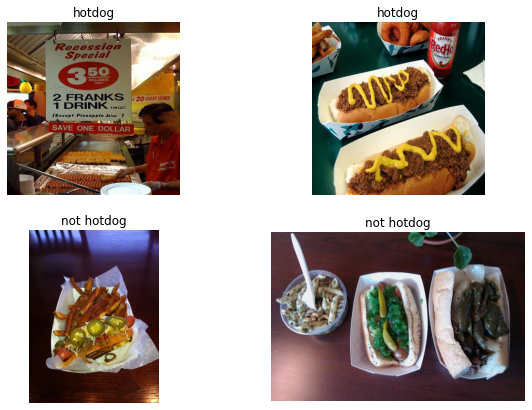

In [5]:
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 2
columns = 2
  
# reading images
Image1 = hd0
Image2 = hd1
Image3 = nhd0
Image4 = nhd1
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("hotdog")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("hotdog")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("not hotdog")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("not hotdog") 

In [23]:
batch_size = 32
img_hight = 28
img_width= 28

In [24]:
train_ds=image_dataset_from_directory(train_dir, seed=123,image_size=(img_hight,img_width), batch_size=batch_size)

Found 4242 files belonging to 2 classes.


In [25]:
val_ds=image_dataset_from_directory(test_dir, seed=123,image_size=(img_hight,img_width), batch_size=batch_size)

Found 400 files belonging to 2 classes.


In [26]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 28, 28, 3)
(32,)


In [27]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [28]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0056725 1.0


In [29]:
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))

In [30]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential

In [31]:
model=Sequential()

#feature extraction 
model.add(Conv2D(32, 3, activation='relu', input_shape=(img_hight,img_width,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,3, activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,3, activation='relu'))
#model.add(MaxPooling2D(4,4))

#flatten imgae into 1d
model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4,activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='Accuracy')

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [33]:
checkpoint = ModelCheckpoint(filepath="bestmodel.hdf5", monitor='val_loss', save_best_only=True, save_weights_only=False, verbose=3)

earlystopper = EarlyStopping(monitor='val_loss', patience=5)

callbackslist = [checkpoint, earlystopper]

In [34]:
model.fit(train_ds, validation_data=val_ds, epochs=20, callbacks=callbackslist)

Epoch 1/20
130/133 [============================>.] - ETA: 0s - loss: 1.4837 - Accuracy: 0.4839
Epoch 1: val_loss improved from inf to 0.71693, saving model to bestmodel.hdf5
133/133 [==============================] - 4s 28ms/step - loss: 1.4707 - Accuracy: 0.4847 - val_loss: 0.7169 - val_Accuracy: 0.5325
Epoch 2/20
131/133 [============================>.] - ETA: 0s - loss: 0.7723 - Accuracy: 0.5050
Epoch 2: val_loss improved from 0.71693 to 0.70161, saving model to bestmodel.hdf5
133/133 [==============================] - 3s 25ms/step - loss: 0.7721 - Accuracy: 0.5045 - val_loss: 0.7016 - val_Accuracy: 0.4975
Epoch 3/20
132/133 [============================>.] - ETA: 0s - loss: 0.7253 - Accuracy: 0.5182
Epoch 3: val_loss improved from 0.70161 to 0.69244, saving model to bestmodel.hdf5
133/133 [==============================] - 3s 25ms/step - loss: 0.7249 - Accuracy: 0.5191 - val_loss: 0.6924 - val_Accuracy: 0.5350
Epoch 4/20
131/133 [============================>.] - ETA: 0s - loss: 0